In [ ]:
import json

def get_batch(i, country_of_origin_id="US", title_type='Movie'):
    movie_titles = []
    ratings = []
    runtimes = []
    release_years = []
    with open(f"imdb_movie_metadata/movie_dataset/movie_dataset/movies_batch_{i}.json") as f:
        titles = json.load(f)
        for title in titles:
            if title['titleType'] is None:
                continue
            if not title['titleType']['text'] == title_type:
                continue
            if title['countriesOfOrigin'] is None:
                continue
            if not country_of_origin_id in [country_metadata['id'] for country_metadata in title['countriesOfOrigin']['countries']]:
                continue
            
            # _imdb_id = title['id']
            # _batch_number = i
            _movie_title = title['titleText']['text']
            _rating = title['ratingsSummary']['aggregateRating']
            _runtime = None if title['runtime'] is None else title['runtime']['seconds']
            _release_year = None if title['releaseYear'] is None else title['releaseYear']['year']            

            if _movie_title is None or _rating is None or _runtime is None or _release_year is None:
                continue

            movie_titles.append(_movie_title)
            ratings.append(_rating)
            runtimes.append(_runtime)
            release_years.append(_release_year)
        
        return {
            'movie_titles': movie_titles,
            'ratings': ratings, 
            'runtimes': runtimes, 
            'release_years': release_years,
        }

def get_batches(batch_numbers: list):
    metadata = {
        'movie_titles': [],
        'ratings': [],
        'runtimes': [],
        'release_years': [],
    }
    for batch_number in batch_numbers:
        batch_metadata = get_batch(batch_number)
        metadata['movie_titles'] += batch_metadata['movie_titles']
        metadata['ratings'] += batch_metadata['ratings']
        metadata['runtimes'] += batch_metadata['runtimes']
        metadata['release_years'] += batch_metadata['release_years']
    
    return metadata

In [ ]:
import json
movie_data = get_batches([i for i in range(1, 714)])
with open('american_movie_data.json', 'w') as f:
    json.dump(movie_data, f)

In [24]:
_movie_data = None
with open('american_movie_data.json', 'r') as file:
    _movie_data = json.load(file)
    file.close()

release_years = _movie_data['release_years']
ratings = _movie_data['ratings']
runtimes = _movie_data['runtimes']

In [70]:
def data_by_years(data, start_year=1900, stop_year=1925):
    filtered_data = {k:[] for k in data.keys()}
    release_years = data['release_years']
    valid_years = [i for i in range(start_year, stop_year)]
    for i, release_year in enumerate(release_years):
        if release_year not in valid_years:
            continue
        for k, v in data.items():
            filtered_data[k].append(v[i])
    
    return filtered_data

import random
def data_by_random_sample(data, N):
    num_data_points = len(data['release_years'])
    sample_indices = random.sample([i for i in range(num_data_points)], min(N, num_data_points))
    filtered_data = {k:[] for k in data.keys()}
    for k, v in data.items():
        filtered_data[k] = [v[i] for i in sample_indices]

    return filtered_data

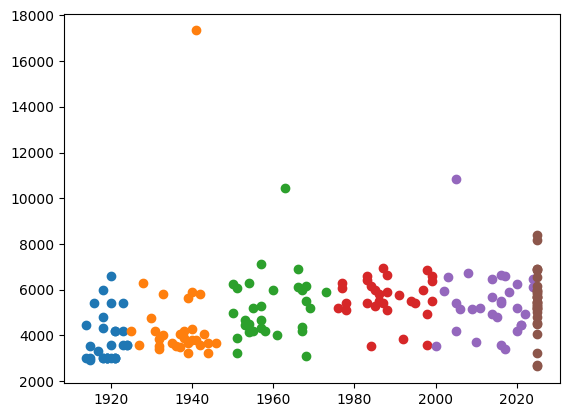

In [71]:
import matplotlib.pyplot as plt

movie_data_1900 = data_by_random_sample(data_by_years(_movie_data, start_year=1900, stop_year=1925), 30)
movie_data_1925 = data_by_random_sample(data_by_years(_movie_data, start_year=1925, stop_year=1950), 30)
movie_data_1950 = data_by_random_sample(data_by_years(_movie_data, start_year=1950, stop_year=1975), 30)
movie_data_1975 = data_by_random_sample(data_by_years(_movie_data, start_year=1975, stop_year=2000), 30)
movie_data_2000 = data_by_random_sample(data_by_years(_movie_data, start_year=2000, stop_year=2025), 30)
movie_data_2025 = data_by_random_sample(data_by_years(_movie_data, start_year=2025, stop_year=2050), 30)

plt.scatter(movie_data_1900['release_years'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['runtimes'])

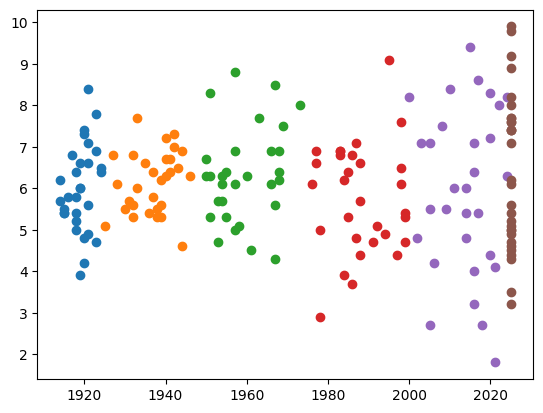

In [72]:
plt.scatter(movie_data_1900['release_years'], movie_data_1900['ratings'])
plt.scatter(movie_data_1925['release_years'], movie_data_1925['ratings'])
plt.scatter(movie_data_1950['release_years'], movie_data_1950['ratings'])
plt.scatter(movie_data_1975['release_years'], movie_data_1975['ratings'])
plt.scatter(movie_data_2000['release_years'], movie_data_2000['ratings'])
plt.scatter(movie_data_2025['release_years'], movie_data_2025['ratings'])

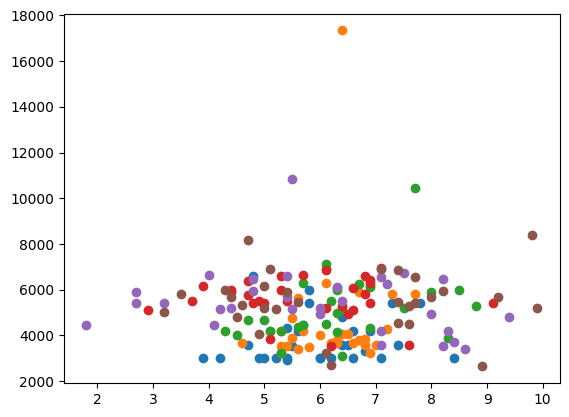

In [73]:
plt.scatter(movie_data_1900['ratings'], movie_data_1900['runtimes'])
plt.scatter(movie_data_1925['ratings'], movie_data_1925['runtimes'])
plt.scatter(movie_data_1950['ratings'], movie_data_1950['runtimes'])
plt.scatter(movie_data_1975['ratings'], movie_data_1975['runtimes'])
plt.scatter(movie_data_2000['ratings'], movie_data_2000['runtimes'])
plt.scatter(movie_data_2025['ratings'], movie_data_2025['runtimes'])

In [30]:
data_by_decade(_movie_data, decade_start=1900)

{'movie_titles': ['The Life of Moses',
  'The Fairylogue and Radio-Plays',
  'The Joe Gans-Battling Nelson Fight',
  'Westinghouse Works',
  'May Day Parade',
  'The Republican National Convention',
  "S. Lubin's Passion Play"],
 'ratings': [5.2, 5, 2.9, 5.3, 4.5, 5.5, 3.9],
 'runtimes': [3000, 7200, 6300, 4080, 3960, 3180, 3600],
 'release_years': [1909, 1908, 1906, 1904, 1900, 1900, 1903]}

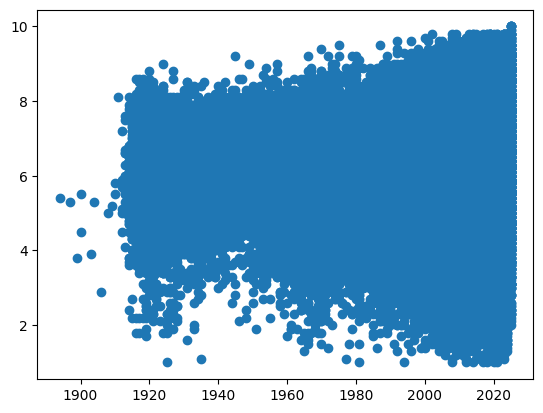

In [25]:
import matplotlib.pyplot as plt

plt.scatter(release_years, ratings)

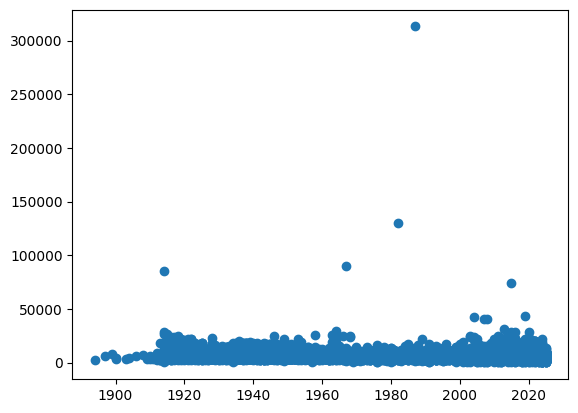

In [26]:
plt.scatter(release_years, runtimes)

In [15]:
len(movie_data['movie_titles'])

93735

In [ ]:
import json

with open('imdb_movie_metadata/movies_batch_1.json') as json_data:
    data = json.load(json_data)
    print(data[2]['titleText']['text'])
    print(data[2]['releaseYear']['year'])
    print(data[2]['runtime']['seconds'])
    print(data[2]['ratingsSummary']['aggregateRating'])
    print(d[2]['principalCredits']['credits'])

    json_data.close()

